<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
y
no     39922
yes     5289
Name: count, dtype: int64


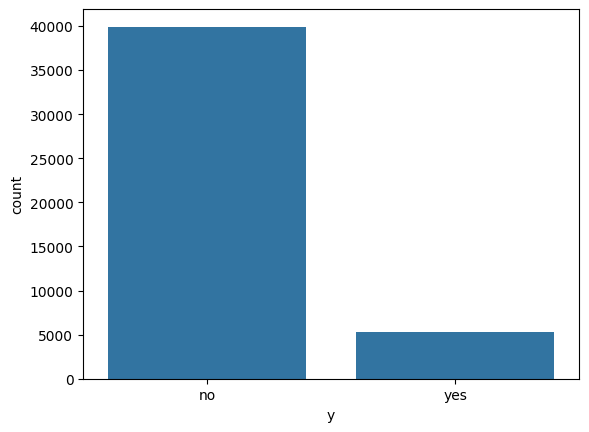

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('bank-full.csv', sep=';')
print(data.info())
print(data['y'].value_counts())

# Quick plot
sns.countplot(x='y', data=data)
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:31:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.66      0.50      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043

ROC-AUC: 0.9285456091268047


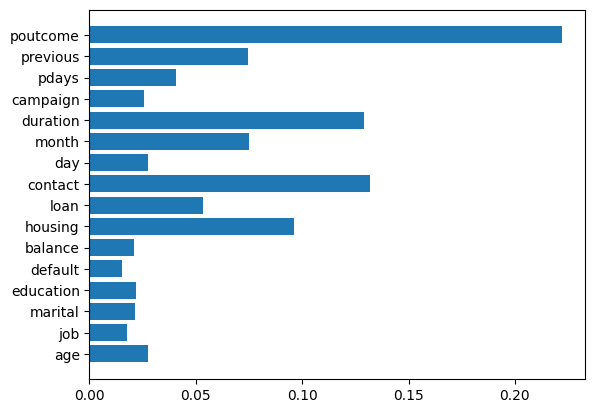

In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# Feature importance
import matplotlib.pyplot as plt
plt.barh(X.columns, model.feature_importances_)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Data Info:
 None

Target Distribution:
 y
no     39922
yes     5289
Name: count, dtype: int64


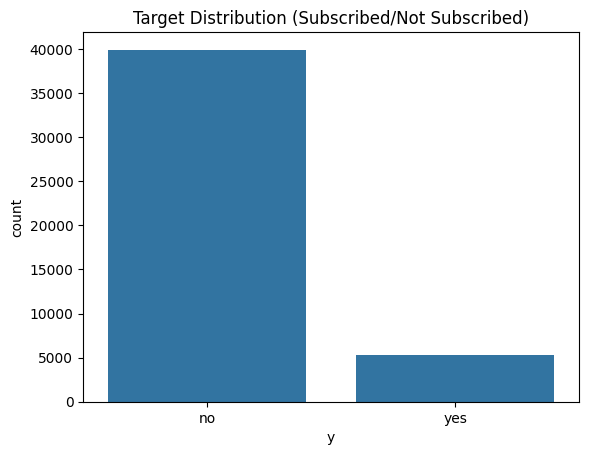

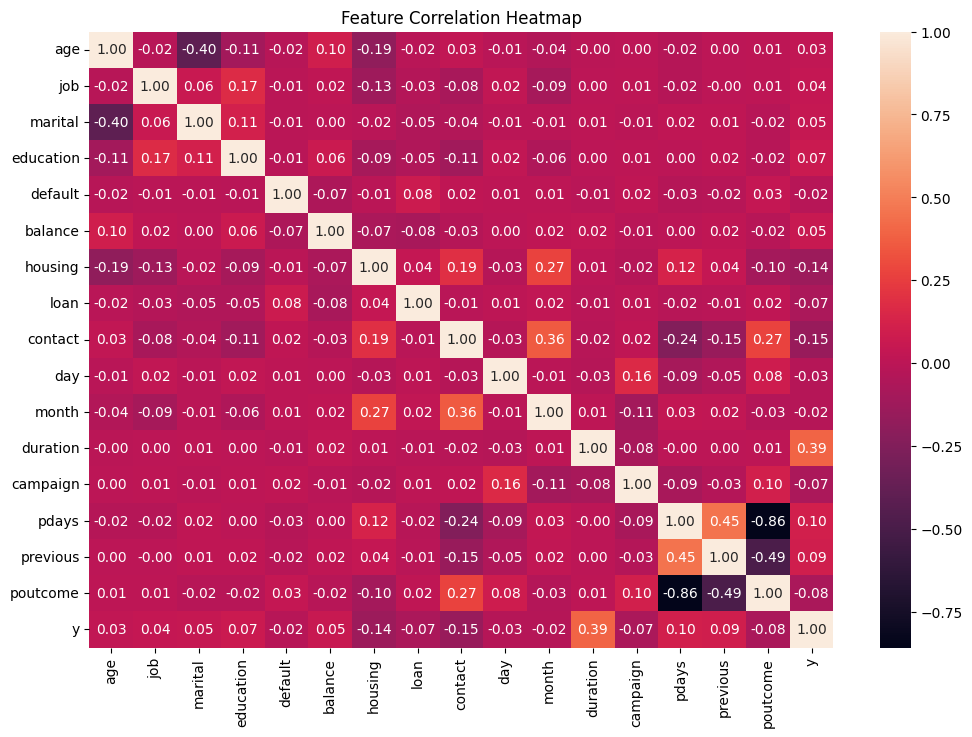

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:35:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.66      0.50      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043

ROC-AUC Score: 0.9285456091268047


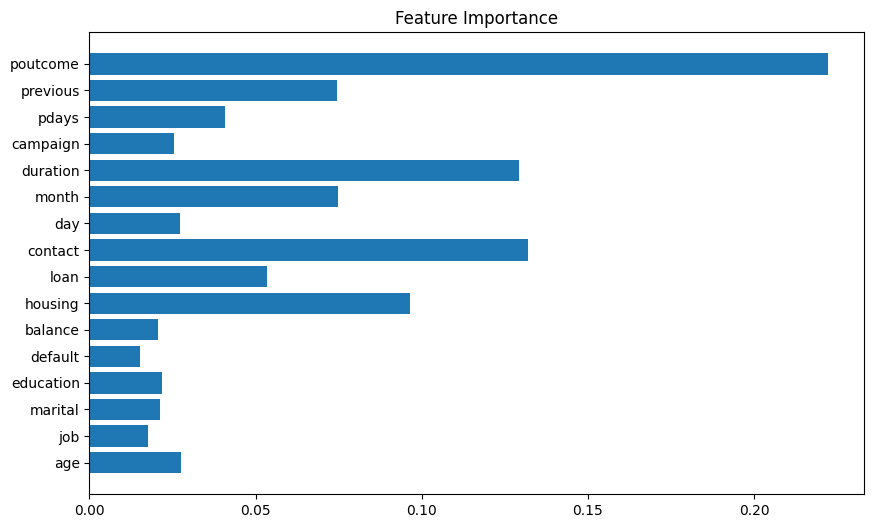

In [6]:
# ========================================
# Bank Marketing Prediction - Fast Track
# ========================================

# Step 1: Load Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Step 2: Load Dataset
data = pd.read_csv('bank-full.csv', sep=';')
print("Data Info:\n", data.info())
print("\nTarget Distribution:\n", data['y'].value_counts())

# Step 3: Quick EDA
sns.countplot(x='y', data=data)
plt.title('Target Distribution (Subscribed/Not Subscribed)')
plt.show()

# Step 4: Feature Engineering - Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Step 5: Optional correlation heatmap (all numeric now)
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 6: Train/Test Split
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 8: Evaluate Model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)

# Step 9: Feature Importance
plt.figure(figsize=(10,6))
plt.barh(X.columns, model.feature_importances_)
plt.title('Feature Importance')
plt.show()

# Step 10: Quick Insights (fill in 1-2 sentences)
# Example:
# Top features influencing subscription: duration, previous contact, age
# Actionable: Focus marketing calls on high-duration leads and specific age groups



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Dataset Info:
 None

Target Distribution:
 y
no     39922
yes     5289
Name: count, dtype: int64


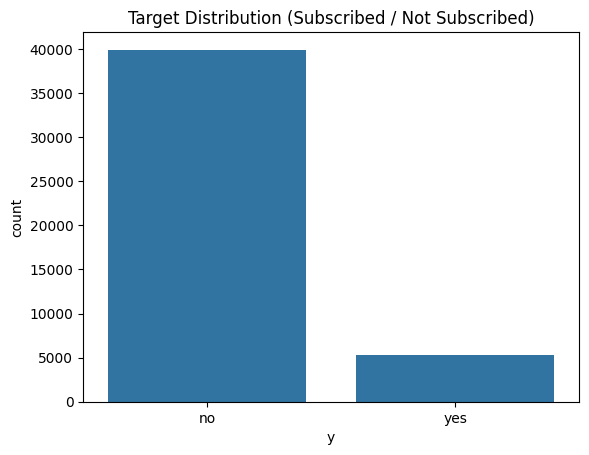

In [7]:
# 2. Data Acquisition and EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('bank-full.csv', sep=';')
print("Dataset Info:\n", data.info())
print("\nTarget Distribution:\n", data['y'].value_counts())

# Plot target distribution
sns.countplot(x='y', data=data)
plt.title('Target Distribution (Subscribed / Not Subscribed)')
plt.show()


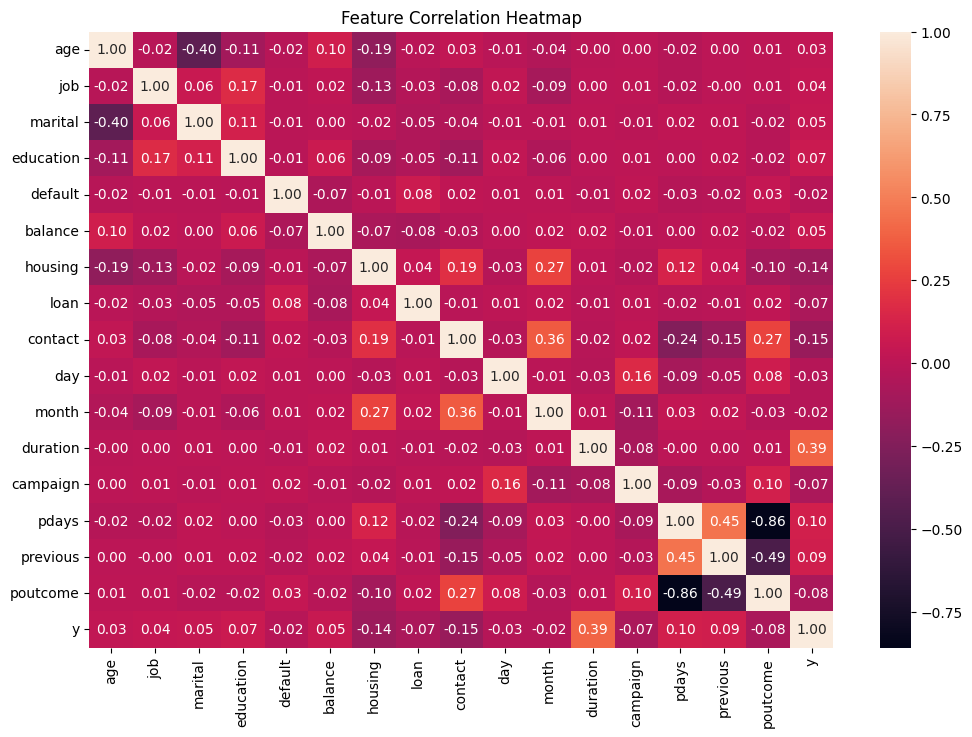

In [8]:
# Quick correlation heatmap (after encoding)
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [9]:
# 3. Advanced Feature Engineering
# Create 5 simple engineered features for speed
data['age_group'] = pd.cut(data['age'], bins=[0,30,45,60,100], labels=[0,1,2,3])
data['high_balance'] = (data['balance'] > data['balance'].median()).astype(int)
data['contacted_before'] = (data['previous'] > 0).astype(int)
data['long_call'] = (data['duration'] > data['duration'].median()).astype(int)
data['duration_previous'] = data['duration'] * data['previous']

print(data.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  ...  campaign  pdays  previous  poutcome  y  age_group  high_balance  \
0    5  ...         1     -1         0         3  0          2             1   
1    5  ...         1     -1         0         3  0          1             0   
2    5  ...         1     -1         0         3  0          1             0   
3    5  ...         1     -1         0         3  0          2             1   
4    5  ...         1     -1         0         3  0          1             0   

  contacted_before  long_call  duration_previous  
0    

In [10]:
# 4. Methodology and Modeling
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split data
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:age_group: category

In [11]:
# After creating age_group
data['age_group'] = data['age_group'].cat.codes


In [12]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)


In [13]:
# Feature engineering
data['age_group'] = pd.cut(data['age'], bins=[0,30,45,60,100], labels=[0,1,2,3])
data['age_group'] = data['age_group'].cat.codes   # <-- convert to integer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Dataset Info:
 None

Target Distribution:
 y
no     39922
yes     5289
Name: count, dtype: int64


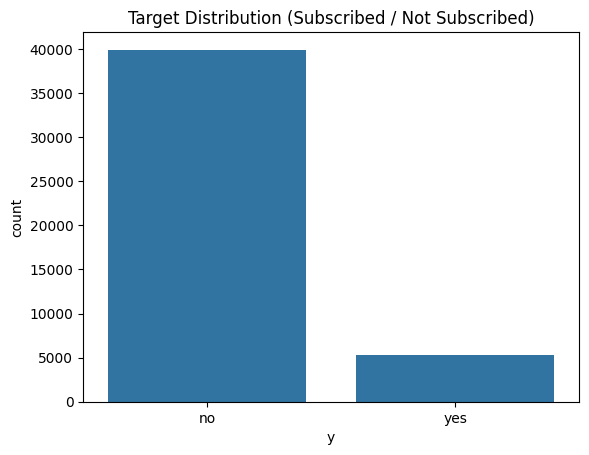

In [14]:
# 2. Data Acquisition and EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('bank-full.csv', sep=';')
print("Dataset Info:\n", data.info())
print("\nTarget Distribution:\n", data['y'].value_counts())

# Plot target distribution
sns.countplot(x='y', data=data)
plt.title('Target Distribution (Subscribed / Not Subscribed)')
plt.show()


In [15]:
# 3. Data Cleaning & Feature Engineering
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Create 5 engineered features
data['age_group'] = pd.cut(data['age'], bins=[0,30,45,60,100], labels=[0,1,2,3])
data['age_group'] = data['age_group'].cat.codes        # Fix for XGBoost
data['high_balance'] = (data['balance'] > data['balance'].median()).astype(int)
data['contacted_before'] = (data['previous'] > 0).astype(int)
data['long_call'] = (data['duration'] > data['duration'].median()).astype(int)
data['duration_previous'] = data['duration'] * data['previous']

print(data.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  ...  campaign  pdays  previous  poutcome  y  age_group  high_balance  \
0    5  ...         1     -1         0         3  0          2             1   
1    5  ...         1     -1         0         3  0          1             0   
2    5  ...         1     -1         0         3  0          1             0   
3    5  ...         1     -1         0         3  0          2             1   
4    5  ...         1     -1         0         3  0          1             0   

   contacted_before  long_call  duration_previous  
0   

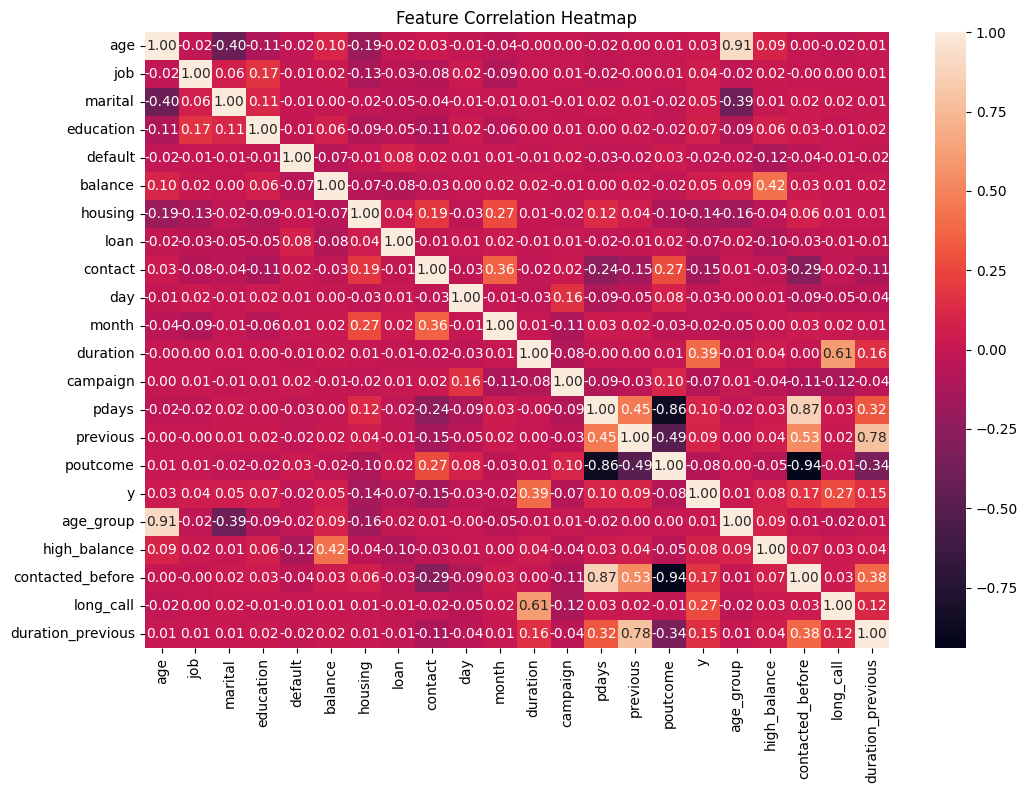

In [16]:
# Optional correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [17]:
# 4. Methodology and Modeling
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split data
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:41:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.64      0.49      0.56      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043

ROC-AUC Score: 0.9281412581815365


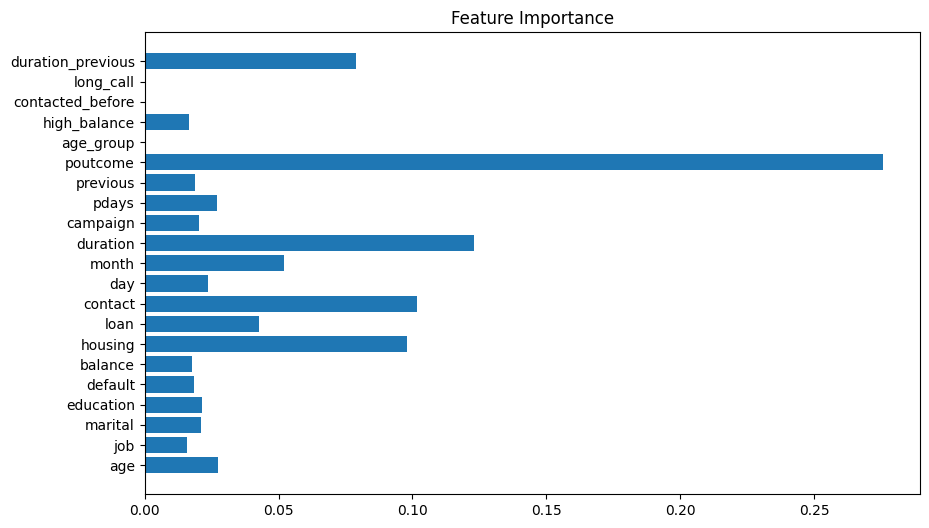

In [18]:
# 5. Results and Evaluation
# Feature importance
plt.figure(figsize=(10,6))
plt.barh(X.columns, model.feature_importances_)
plt.title('Feature Importance')
plt.show()
